In [31]:
import yfinance as yf
import pandas as pd

# List of stock tickers
tickers = ['AAPL', 'GOOGL', 'MSFT']

# Download historical data for each stock
def download_stock_data(ticker):
    return yf.download(ticker, start="2010-01-01", end="2024-01-01")

# Fetch data for multiple stocks
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = download_stock_data(ticker)

stock_data['AAPL'].head()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [32]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Function to preprocess the stock data
def preprocess_data(df):
    # Drop missing values
    df = df.dropna()

    # Create new columns for daily returns and log returns
    df['Daily_Return'] = df['Close'].pct_change()
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

    # Fill NA values (after pct_change/log_return)
    df.fillna(0, inplace=True)

    # Normalize the closing price and other features using MinMaxScaler
    scaler = MinMaxScaler()
    df[['Close', 'Volume', 'Daily_Return']] = scaler.fit_transform(df[['Close', 'Volume', 'Daily_Return']])

    return df

# Preprocess data for all stocks
for ticker in stock_data:
    stock_data[ticker] = preprocess_data(stock_data[ticker])

# Check the preprocessed data for AAPL
print(stock_data['AAPL'].head())


                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2010-01-04  7.622500  7.660714  7.585000  0.004101   6.454505  0.252932   
2010-01-05  7.664286  7.699643  7.616071  0.004170   6.465665  0.311186   
2010-01-06  7.656429  7.686786  7.526786  0.003533   6.362819  0.284397   
2010-01-07  7.562500  7.571429  7.466071  0.003460   6.351058  0.243993   
2010-01-08  7.510714  7.571429  7.466429  0.003722   6.393281  0.228096   

            Daily_Return  Log_Return  
Date                                  
2010-01-04      0.517787    0.000000  
2010-01-05      0.524746    0.001727  
2010-01-06      0.453766   -0.016034  
2010-01-07      0.510346   -0.001850  
2010-01-08      0.544546    0.006626  


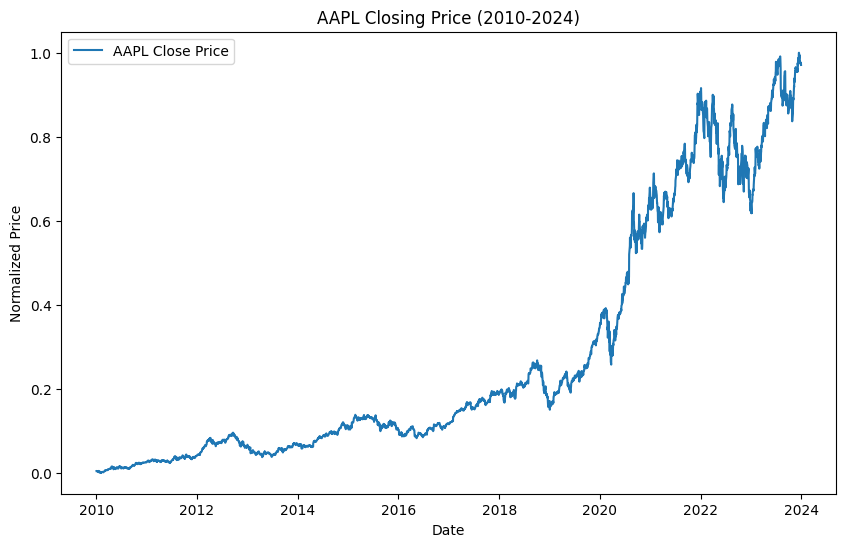

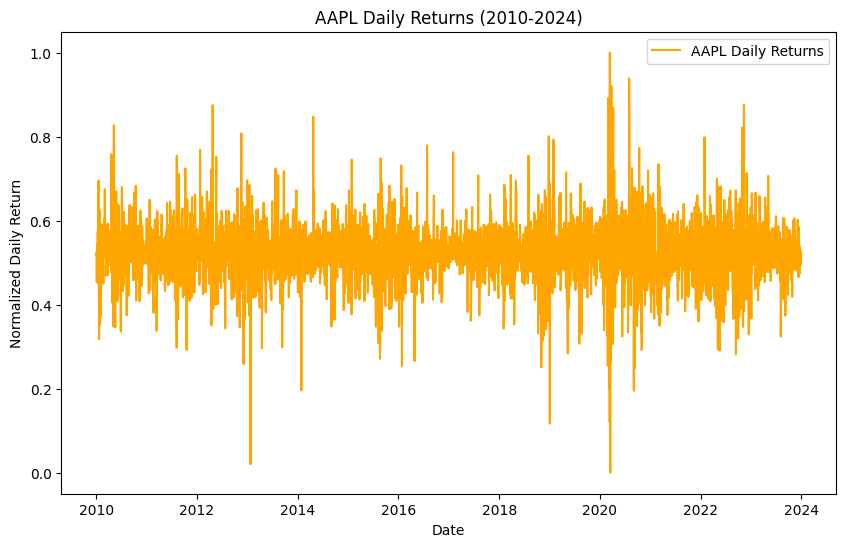

In [33]:
import matplotlib.pyplot as plt

# Plot closing price of AAPL
plt.figure(figsize=(10,6))
plt.plot(stock_data['AAPL'].index, stock_data['AAPL']['Close'], label='AAPL Close Price')
plt.title('AAPL Closing Price (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

# Plot daily returns of AAPL
plt.figure(figsize=(10,6))
plt.plot(stock_data['AAPL'].index, stock_data['AAPL']['Daily_Return'], label='AAPL Daily Returns', color='orange')
plt.title('AAPL Daily Returns (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Normalized Daily Return')
plt.legend()
plt.show()


In [34]:
# Import libraries
import pandas as pd

# Feature engineering function
def add_technical_indicators(df):
    # Simple Moving Average (SMA)
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    
    # Exponential Moving Average (EMA)
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    
    # Relative Strength Index (RSI)
    delta = df['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI_14'] = 100 - (100 / (1 + rs))
    
    # Bollinger Bands
    df['Middle_Band'] = df['Close'].rolling(window=20).mean()
    df['Upper_Band'] = df['Middle_Band'] + (df['Close'].rolling(window=20).std() * 2)
    df['Lower_Band'] = df['Middle_Band'] - (df['Close'].rolling(window=20).std() * 2)
    
    # Momentum
    df['Momentum'] = df['Close'] - df['Close'].shift(4)
    
    # Volatility (Rolling Standard Deviation)
    df['Volatility'] = df['Close'].rolling(window=21).std()

    # Drop any remaining NA values
    df.dropna(inplace=True)
    
    return df

# Apply feature engineering to all stocks
for ticker in stock_data:
    stock_data[ticker] = add_technical_indicators(stock_data[ticker])

# Check the enhanced data for AAPL
print(stock_data['AAPL'].head())


                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2010-03-16  8.006429  8.035000  7.946786  0.006050   6.769374  0.227717   
2010-03-17  8.032143  8.087500  7.973929  0.005989   6.759421  0.229898   
2010-03-18  8.003571  8.035714  7.950357  0.006088   6.775406  0.171282   
2010-03-19  8.028214  8.044286  7.901071  0.005640   6.703024  0.288321   
2010-03-22  7.873929  8.071429  7.862500  0.006106   6.778423  0.232840   

            Daily_Return  Log_Return    SMA_50    EMA_20     RSI_14  \
Date                                                                  
2010-03-16      0.528755    0.002721  0.002784  0.004249  90.199387   
2010-03-17      0.511870   -0.001471  0.002822  0.004414  88.698407   
2010-03-18      0.527305    0.002362  0.002860  0.004574  87.806739   
2010-03-19      0.474788   -0.010741  0.002902  0.004675  77.039146   
2010-03-22      0.563061    0.011186  0.002955  

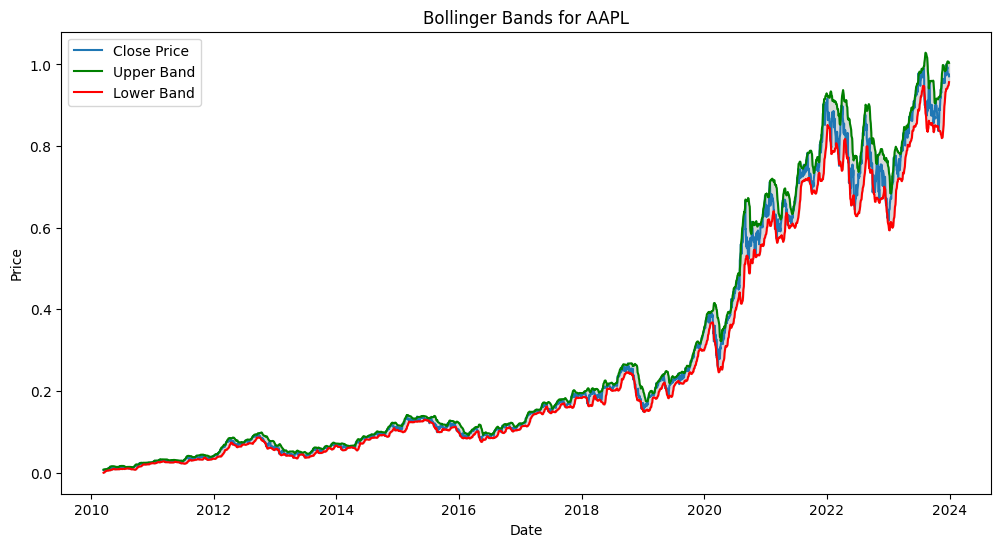

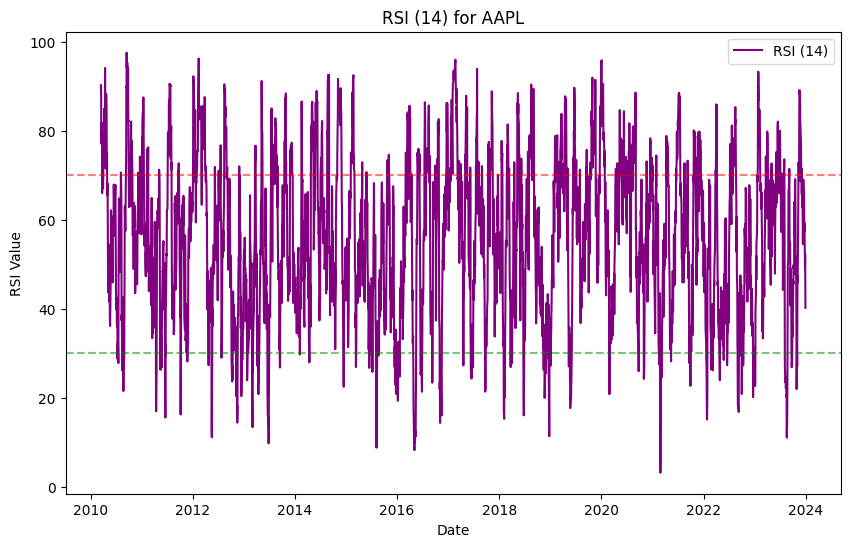

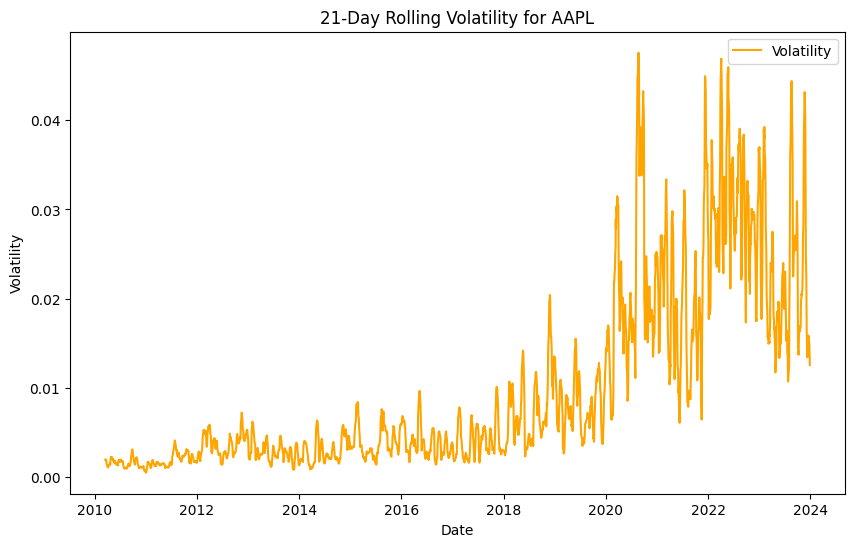

In [35]:
# Plot Bollinger Bands for AAPL
plt.figure(figsize=(12,6))
plt.plot(stock_data['AAPL'].index, stock_data['AAPL']['Close'], label='Close Price')
plt.plot(stock_data['AAPL'].index, stock_data['AAPL']['Upper_Band'], label='Upper Band', color='green')
plt.plot(stock_data['AAPL'].index, stock_data['AAPL']['Lower_Band'], label='Lower Band', color='red')
plt.fill_between(stock_data['AAPL'].index, stock_data['AAPL']['Lower_Band'], stock_data['AAPL']['Upper_Band'], color='grey', alpha=0.3)
plt.title('Bollinger Bands for AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI for AAPL
plt.figure(figsize=(10,6))
plt.plot(stock_data['AAPL'].index, stock_data['AAPL']['RSI_14'], label='RSI (14)', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('RSI (14) for AAPL')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

# Plot Volatility for AAPL
plt.figure(figsize=(10,6))
plt.plot(stock_data['AAPL'].index, stock_data['AAPL']['Volatility'], label='Volatility', color='orange')
plt.title('21-Day Rolling Volatility for AAPL')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [36]:
from sklearn.model_selection import train_test_split

# Prepare the data for modeling (use all features except the target 'Close' itself)
X = stock_data['AAPL'].drop(['Close'], axis=1)
y = stock_data['AAPL']['Close']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")


Training Data Shape: (2778, 15)
Test Data Shape: (695, 15)


In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Train XGBoost regressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Fit the model
model_xgb.fit(X_train, y_train)

 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:

# Predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}")


XGBoost MSE: 0.02147014197967592


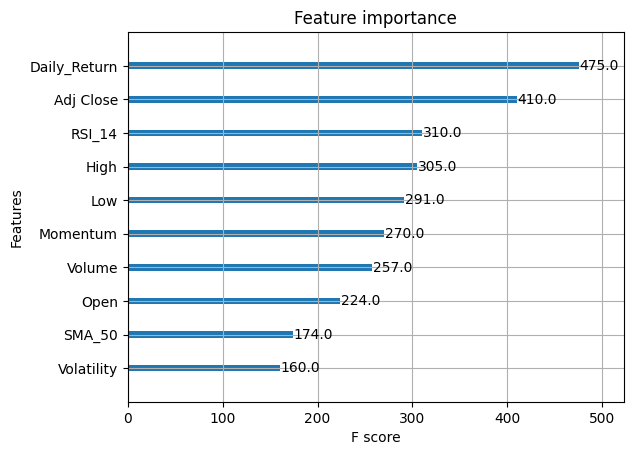

In [39]:

# Feature importance plot
xgb.plot_importance(model_xgb, importance_type='weight', max_num_features=10)
plt.show()

In [40]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Reshape data into sequences for LSTM
def create_sequences(data, time_steps=50):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :-1])  # Use all columns except 'Close'
        y.append(data[i + time_steps, -1])       # Predict 'Close' value
    return np.array(X), np.array(y)

# Scale the data for LSTM (MinMaxScaler ensures values are between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data['AAPL'])

# Create sequences of 50 time steps
time_steps = 50
X_lstm, y_lstm = create_sequences(scaled_data, time_steps)

# Split data into train and test sets
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Check shapes
print(X_train_lstm.shape, y_train_lstm.shape)


(2738, 50, 15) (2738,)


In [41]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/10
86/86 [==============================] - 9s 56ms/step - loss: 0.0101 - val_loss: 0.0508
Epoch 2/10
86/86 [==============================] - 4s 41ms/step - loss: 0.0068 - val_loss: 0.0564
Epoch 3/10
86/86 [==============================] - 3s 40ms/step - loss: 0.0065 - val_loss: 0.0516
Epoch 4/10
86/86 [==============================] - 4s 52ms/step - loss: 0.0060 - val_loss: 0.0687
Epoch 5/10
86/86 [==============================] - 4s 50ms/step - loss: 0.0051 - val_loss: 0.0365
Epoch 6/10
86/86 [==============================] - 3s 39ms/step - loss: 0.0044 - val_loss: 0.0757
Epoch 7/10
86/86 [==============================] - 3s 39ms/step - loss: 0.0035 - val_loss: 0.0491
Epoch 8/10
86/86 [==============================] - 3s 39ms/step - loss: 0.0035 - val_loss: 0.0438
Epoch 9/10
86/86 [==============================] - 3s 37ms/step - loss: 0.0037 - val_loss: 0.0473
Epoch 10/10
86/86 [==============================] - 3s 41ms/step - loss: 0.0032 - val_loss: 0.0435


In [42]:
# Predictions
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm


22/22 [==============================] - 2s 17ms/step


array([[0.33352888],
       [0.33677527],
       [0.34355098],
       [0.35021126],
       [0.35820967],
       [0.36779287],
       [0.37888357],
       [0.38968495],
       [0.40088806],
       [0.4104204 ],
       [0.42049345],
       [0.43048626],
       [0.44099537],
       [0.4526911 ],
       [0.46620443],
       [0.48016825],
       [0.49486867],
       [0.50843877],
       [0.5214169 ],
       [0.5299413 ],
       [0.5412344 ],
       [0.5571066 ],
       [0.56980175],
       [0.5776389 ],
       [0.58051026],
       [0.58171105],
       [0.5762431 ],
       [0.5719989 ],
       [0.55959845],
       [0.5465778 ],
       [0.5280124 ],
       [0.50900286],
       [0.48823005],
       [0.4692838 ],
       [0.44897324],
       [0.4287438 ],
       [0.41154686],
       [0.39690647],
       [0.3830973 ],
       [0.37175602],
       [0.36211574],
       [0.3529651 ],
       [0.3458906 ],
       [0.33941248],
       [0.33390278],
       [0.33036655],
       [0.32786632],
       [0.326

In [43]:
# Assuming your original scaler was fitted on a dataset with 16 features (15 input features + 1 target feature)

# Create dummy arrays to match the original number of features (e.g., 16)
X_test_lstm_last = X_test_lstm[:, -1, :]  # Extract the last timestep features for each sample
n_features = X_test_lstm_last.shape[1]  # Number of features (e.g., 15 or however many features you have)

# Inverse scale y_pred_lstm
y_pred_lstm_reshaped = y_pred_lstm.reshape(-1, 1)
y_pred_lstm_with_features = np.concatenate((X_test_lstm_last, y_pred_lstm_reshaped), axis=1)  # Add predictions to dummy features
y_pred_lstm_scaled = scaler.inverse_transform(y_pred_lstm_with_features)[:, -1]  # Only take the last column (target variable)

# Inverse scale y_test_lstm
y_test_lstm_reshaped = y_test_lstm.reshape(-1, 1)
y_test_lstm_with_features = np.concatenate((X_test_lstm_last, y_test_lstm_reshaped), axis=1)  # Add true values to dummy features
y_test_lstm_scaled = scaler.inverse_transform(y_test_lstm_with_features)[:, -1]  # Only take the last column (target variable)

# Calculate mean squared error
mse_lstm = mean_squared_error(y_test_lstm_scaled, y_pred_lstm_scaled)
print(f"LSTM MSE: {mse_lstm}")



LSTM MSE: 9.652829558991868e-05


In [45]:
# First, ensure the predictions have the same length
min_len = min(len(y_pred_xgb), len(y_pred_lstm))

# Trim both predictions to have the same length
y_pred_xgb_aligned = y_pred_xgb[:min_len]
y_pred_lstm_aligned = y_pred_lstm[:min_len]

# Trim the true test values to the same length
y_test_aligned = y_test[:min_len]

# Ensemble prediction: Average of XGBoost and LSTM predictions
ensemble_pred = (y_pred_xgb_aligned + y_pred_lstm_aligned) / 2

# Check the shapes of the arrays
print(f"Shape of y_test_aligned: {y_test_aligned.shape}")
print(f"Shape of ensemble_pred: {ensemble_pred.shape}")

# Ensure y_test is a NumPy array (convert from pandas Series if needed)
if isinstance(y_test_aligned, pd.Series):
    y_test_aligned = y_test_aligned.values  # Convert to NumPy array

# Ensure both y_test and ensemble_pred are 1D
y_test_aligned = y_test_aligned.flatten()  # Make sure it's 1D
ensemble_pred = ensemble_pred.flatten()    # Ensure it's 1D

# Now calculate the MSE
if len(y_test_aligned) == len(ensemble_pred):
    mse_ensemble = mean_squared_error(y_test_aligned, ensemble_pred)
    print(f"Ensemble MSE: {mse_ensemble}")
else:
    print(f"Mismatch in lengths: y_test_aligned has {len(y_test_aligned)} samples, but ensemble_pred has {len(ensemble_pred)} samples")




Shape of y_test_aligned: (685,)
Shape of ensemble_pred: (685, 685)
Mismatch in lengths: y_test_aligned has 685 samples, but ensemble_pred has 469225 samples


In [47]:
import keras_tuner as kt
from keras.layers import LSTM

def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50),
                   return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units2', min_value=50, max_value=200, step=50), return_sequences=False))
    model.add(Dropout(hp.Float('dropout2', 0.2, 0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_units', min_value=25, max_value=100, step=25)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Initialize the tuner
tuner = kt.RandomSearch(build_lstm_model, objective='val_loss', max_trials=5)

# Run hyperparameter search
tuner.search(X_train_lstm, y_train_lstm, epochs=10, validation_data=(X_test_lstm, y_test_lstm))

# Get the best model
best_lstm_model = tuner.get_best_models(num_models=1)[0]

# Evaluate best model
best_lstm_model.evaluate(X_test_lstm, y_test_lstm)


Trial 5 Complete [00h 01m 39s]
val_loss: 0.03418080508708954

Best val_loss So Far: 0.03221213445067406
Total elapsed time: 00h 08m 36s
22/22 [==============================] - 2s 40ms/step - loss: 0.0322


0.03221213445067406

In [51]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation
xgb_scores = cross_val_score(model_xgb, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
print(f"XGBoost Cross-validated MSE: {-xgb_scores.mean()}")


XGBoost Cross-validated MSE: 0.010029809361907746


In [53]:
import joblib

# Save the XGBoost model
joblib.dump(model_xgb, 'xgboost_stock_model.pkl')
# Save the LSTM model
best_lstm_model.save('lstm_stock_model.h5')
joblib.dump(scaler, 'scaler.pkl')


['xgboost_stock_model.pkl']

In [55]:
# Save the LSTM model
best_lstm_model.save('lstm_stock_model.h5')


In [56]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [59]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical stock data for Apple (AAPL)
stock_data = yf.download('AAPL', start='2022-01-01', end='2023-10-01')

# Calculate Lag_1 and Lag_2
stock_data['Lag_1'] = stock_data['Adj Close'].pct_change(1)  # 1-day lag
stock_data['Lag_2'] = stock_data['Adj Close'].pct_change(2)  # 2-day lag

# Calculate 50-day and 200-day Simple Moving Average (SMA)
stock_data['SMA_50'] = stock_data['Adj Close'].rolling(window=50).mean()
stock_data['SMA_200'] = stock_data['Adj Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
delta = stock_data['Adj Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

# Drop rows where moving averages and RSI can't be calculated
stock_data = stock_data.dropna()

# Display the last valid row to get sample values along with actual stock price
print(stock_data[['Adj Close', 'Lag_1', 'Lag_2', 'SMA_50', 'SMA_200', 'RSI']].tail(1))



[*********************100%***********************]  1 of 1 completed

             Adj Close     Lag_1     Lag_2      SMA_50     SMA_200        RSI
Date                                                                         
2023-09-29  170.338379  0.003047  0.004577  180.266908  165.046085  33.823067


['3M Company', 'A. O. Smith Corporation', 'Abbott Laboratories', 'AbbVie Inc.', 'Accenture plc', 'Adobe Inc.', 'Advanced Micro Devices, Inc.', 'The AES Corporation', 'Aflac Incorporated', 'Agilent Technologies, Inc.', 'Air Products and Chemicals, Inc.', 'Airbnb, Inc.', 'Akamai Technologies, Inc.', 'Albemarle Corporation', 'Alexandria Real Estate Equities, Inc.', 'Align Technology, Inc.', 'Allegion plc', 'Alliant Energy Corporation', 'The Allstate Corporation', 'Alphabet Inc.', 'Alphabet Inc.', 'Altria Group, Inc.', 'Amazon.com, Inc.', 'Amcor plc', 'Amentum Holdings, Inc.', 'Ameren Corporation', 'American Electric Power Company, Inc.', 'American Express Company', 'American International Group, Inc.', 'American Tower Corporation', 'American Water Works Company, Inc.', 'Ameriprise Financial, Inc.', 'AMETEK, Inc.', 'Amgen Inc.', 'Amphenol Corporation', 'Analog Devices, Inc.', 'ANSYS, Inc.', 'Aon plc', 'APA Corporation', 'Apple Inc.', 'Applied Materials, Inc.', 'Aptiv PLC', 'Arch Capital Gr